In [13]:
from missing_bids import auction_data, analytics, environments
hist_plot = auction_data.hist_plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

sns.set_style('white')
%matplotlib inline

In [16]:
# getting data directory
def find(name, path):
    for root, dirs, _ in os.walk(path):
        if name in dirs:
            return os.path.join(root, name)
path_data = find('data_for_missing_bids_figures', '/')
print('data located at \n\t{}'.format(path_data))
path_figures = os.path.join(path_data, 'figures')
if not os.path.exists(path_figures):
    os.makedirs(path_figures)


data located at 
	/home/sylvain/Dropbox/Econ/papiers/gameTheory/missing_bids/data/data_for_missing_bids_figures


[0.10295938795649295, 0.5598686749645867, 0.5983226268918276, 0.680249092953302]
-3.251365298668419e-13
-1.0644988200995469e-12
-2.702523397235171e-13
-4.455978311471284e-13
[1.000000000000325, 1.0000000000010645, 1.0000000000002702, 1.0000000000004456]


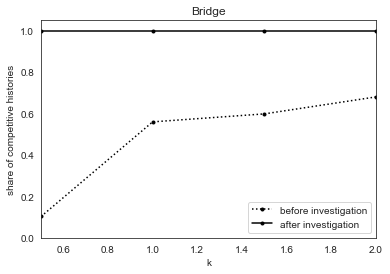

In [22]:
k_array = [0.5, 1, 1.5, 2]
bridge_before = []
bridge_after = []

bridge_data = auction_data.AuctionData('../tests/reference_data/bc_collusion.csv')

bridge_data_after = auction_data.AuctionData(
    bridge_data.df_bids.loc[bridge_data.data.before.isnull()])

bridge_data_before = auction_data.AuctionData(
    bridge_data.df_bids.loc[bridge_data.data.before==1])

deviations = [-.025, .0, .001]

filter_ties = auction_data.FilterTies(tolerance=.0001)
filtered_data_bridge_before = filter_ties(bridge_data_before)
demands_bridge_before = [filtered_data_bridge_before.get_counterfactual_demand(rho) for rho in deviations]
share_ties = filter_ties.get_ties(filtered_data_bridge_before).mean()

for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_bridge_before)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_bridge_before, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )

    share_collusive = min_collusion_solver.result.solution    
    bridge_before.append(1 - share_collusive)

print(bridge_before)

filtered_data_bridge_after = filter_ties(bridge_data_after)
demands_bridge_after = [filtered_data_bridge_after.get_counterfactual_demand(rho) for rho in deviations]
share_ties = filter_ties.get_ties(filtered_data_bridge_after).mean()


for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_bridge_after)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=bridge_data_after, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )

    share_collusive = min_collusion_solver.result.solution
    print(share_collusive)
    bridge_after.append(1 - share_collusive)
    
print(bridge_after)

plt.title('Bridge')
plt.plot(k_array,bridge_before, 'k.:', label="before investigation")
plt.plot(k_array,bridge_after, 'k.-', label="after investigation")
plt.legend(loc='lower right')
plt.axis([0.5, 2, 0, 1.05])
plt.xlabel('k')
plt.ylabel('share of competitive histories')
plt.savefig('bc-plot_histories.pdf')

0.18321648019943626
0.5983225892578791
0.5983225231219441
0.6802490358678738
[0.18321648019943626, 0.5983225892578791, 0.5983225231219441, 0.6802490358678738]
1.000000000002997
1.0000000000002918
1.0000000000003777
1.0000000000003555
[1.0000000000002967, 1.000000000005243, 1.0000000000008162, 1.0000000000094391]


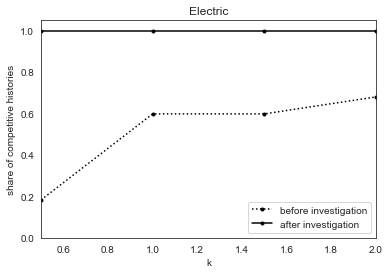

In [23]:
k_array = [0.5, 1, 1.5, 2]
electric_before = []
electric_after = []

electric_data = auction_data.AuctionData('../tests/reference_data/ec_collusion.csv')

electric_data_after = auction_data.AuctionData(
    electric_data.df_bids.loc[electric_data.data.before.isnull()])

electric_data_before = auction_data.AuctionData(
    electric_data.df_bids.loc[electric_data.data.before==1])


deviations = [-.025, .0, .001]

filter_ties = auction_data.FilterTies(tolerance=.0001)
filtered_data_electric_before = filter_ties(electric_data_before)
demands_electric_before = [filtered_data_electric_before.get_counterfactual_demand(rho) for rho in deviations]
share_ties = filter_ties.get_ties(filtered_data_electric_before).mean()

for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_electric_before)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_electric_before, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )
    share = min_collusion_solver.result.solution
    print(1 - share)            
    electric_before.append(1 - share)

print(electric_before)

filtered_data_electric_after = filter_ties(electric_data_after)
demands_electric_after = [filtered_data_electric_after.get_counterfactual_demand(rho) for rho in deviations]
share_ties = filter_ties.get_ties(filtered_data_electric_after).mean()


for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_electric_after)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_electric_after, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )

    print(1 - min_collusion_solver.result.solution)    
    electric_after.append(1 - min_collusion_solver.result.solution)
    
print(electric_after)

plt.title('Electric')
plt.plot(k_array,electric_before, 'k.:', label="before investigation")
plt.plot(k_array,electric_after, 'k.-', label="after investigation")
plt.legend(loc='lower right')
plt.axis([0.5, 2, 0, 1.05])
plt.xlabel('k')
plt.ylabel('share of competitive histories')
plt.savefig('ec-plot_histories.pdf')

0.10295937333914851
0.1730758591886128
0.5598685884617409
0.59832244838615
[0.10295937333914851, 0.1730758591886128, 0.5598685884617409, 0.59832244838615]
0.11997271132688259
0.5983227833334761
0.598322441108433
0.680248497172645
[0.11997271132688259, 0.5983227833334761, 0.598322441108433, 0.680248497172645]


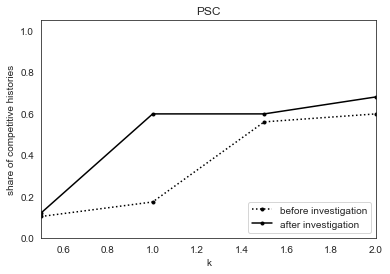

In [24]:
k_array = [0.5, 1, 1.5, 2]
psc_before = []
psc_after = []


psc_data = auction_data.AuctionData('../tests/reference_data/pc_collusion.csv')

psc_data_after = auction_data.AuctionData(
    psc_data.df_bids.loc[psc_data.data.before.isnull()])

psc_data_before = auction_data.AuctionData(
    psc_data.df_bids.loc[psc_data.data.before==1])


deviations = [-.025, .0, .001]

filter_ties = auction_data.FilterTies(tolerance=.0001)
filtered_data_psc_before = filter_ties(psc_data_before)
demands_psc_before = [filtered_data_psc_before.get_counterfactual_demand(rho) for rho in deviations]
share_ties = filter_ties.get_ties(filtered_data_psc_before).mean()

for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_psc_before)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_psc_before, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )
    share = min_collusion_solver.result.solution
    print(1 - share)            
    psc_before.append(1 - share)

print(psc_before)

filtered_data_psc_after = filter_ties(psc_data_after)
demands_psc_after = [filtered_data_psc_after.get_counterfactual_demand(rho) for rho in deviations]
share_ties = filter_ties.get_ties(filtered_data_psc_after).mean()


for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_psc_after)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_psc_after, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )
    share = min_collusion_solver.result.solution
    print(1 - share)            
    psc_after.append(1 - share)
    
print(psc_after)

plt.title('PSC')
plt.plot(k_array,psc_before, 'k.:', label="before investigation")
plt.plot(k_array,psc_after, 'k.-', label="after investigation")
plt.legend(loc='lower right')
plt.axis([0.5, 2, 0, 1.05])
plt.xlabel('k')
plt.ylabel('share of competitive histories')  
plt.savefig('psc-plot_histories.pdf')

0.1282865054704765
0.559868605237039
0.5983226879689248
0.6802484378258002
[0.1282865054704765, 0.559868605237039, 0.5983226879689248, 0.6802484378258002]
0.5598686472557519
0.5983228671631053
0.6802484907774873
0.680248689482313
[0.5598686472557519, 0.5983228671631053, 0.6802484907774873, 0.680248689482313]


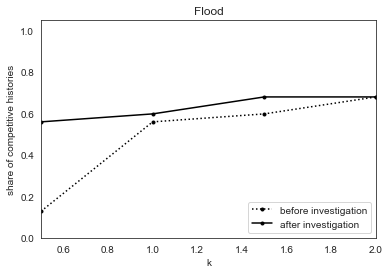

In [25]:
k_array = [0.5, 1, 1.5, 2]
fc_before = []
fc_after = []


fc_data = auction_data.AuctionData('../tests/reference_data/fc_collusion.csv')

fc_data_after = auction_data.AuctionData(
    fc_data.df_bids.loc[fc_data.data.before.isnull()])

fc_data_before = auction_data.AuctionData(
    fc_data.df_bids.loc[fc_data.data.before==1])


deviations = [-.03, .0, .001]

filter_ties = auction_data.FilterTies(tolerance=.0001)
filtered_data_fc_before = filter_ties(fc_data_before)
demands_fc_before = [filtered_data_fc_before.get_counterfactual_demand(rho) for rho in deviations]
share_ties = filter_ties.get_ties(filtered_data_fc_before).mean()

for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=0.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_fc_before)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_fc_before, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )
    share = min_collusion_solver.result.solution
    print(1 - share)            
    fc_before.append(1 - share)

print(fc_before)

filtered_data_fc_after = filter_ties(fc_data_after)
demands_fc_after = [filtered_data_fc_after.get_counterfactual_demand(rho) for rho in deviations]
share_ties = filter_ties.get_ties(filtered_data_fc_after).mean()


for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=0.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_fc_after)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_fc_after, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )
    share = min_collusion_solver.result.solution
    print(1 - share)            
    fc_after.append(1 - share)
    
print(fc_after)

plt.title('Flood')
plt.plot(k_array,fc_before, 'k.:', label="before investigation")
plt.plot(k_array,fc_after, 'k.-', label="after investigation")
plt.legend(loc='lower right')
plt.axis([0.5, 2, 0, 1.05])
plt.xlabel('k')
plt.ylabel('share of competitive histories') 
plt.savefig('fc-plot_histories.pdf')


0.058235570342731746
0.16857147585170684
0.22134727758151185
0.25937637633300337
[0.0576289498183283, 0.1668155229782515, 0.21904157677337108, 0.2566745390795346]
0.5611470198360439
0.27680985500156213
0.036445287935858744
7.881346332653507e-11
[0.44469826162058157, 0.7260735809880374, 0.9639343504801398, 0.9999999999220075]


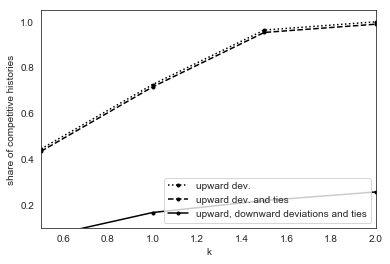

In [26]:
tsuchiura_data = auction_data.AuctionData('../tests/reference_data/tsuchiura_data.csv')
tsuchiura_before_min_price = auction_data.AuctionData(
    tsuchiura_data.df_bids.loc[tsuchiura_data.data.minprice.isnull()])


k_array = [0.5, 1, 1.5, 2]
comp_histories = []

deviations = [-.02, .0, .0008]
filter_ties = auction_data.FilterTies(tolerance=.0001)
filtered_data = filter_ties(tsuchiura_before_min_price)
demands = [filtered_data.get_counterfactual_demand(rho) for rho in deviations]

share_ties = filter_ties.get_ties(tsuchiura_before_min_price).mean()


for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.25, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )
    share = min_collusion_solver.result.solution
    print(1 - share)            
    comp_histories.append(1 - (1-share_ties)*share - share_ties)

print(comp_histories)

comp_histories_upward = []
comp_histories_upward_ties = []

deviations = [.0, .0008]
demands = [filtered_data.get_counterfactual_demand(rho) for rho in deviations]
#print(demands)
#print(share_ties)

for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.25, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands)]
    
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 1])
    )

    share = min_collusion_solver.result.solution
    print(share)            
#    result = min_collusion_solver.result
#    result_up = min_collusion_solver_up.result
    comp_histories_upward.append(1 - (1-share_ties)*share)
    comp_histories_upward_ties.append(1 - (1-share_ties)*share - share_ties)

print(comp_histories_upward)

plt.plot(k_array,comp_histories_upward, 'k.:', label="upward dev.")
plt.plot(k_array,comp_histories_upward_ties, 'k.--', label="upward dev. and ties")
plt.plot(k_array,comp_histories, 'k.-', label="upward, downward deviations and ties")
plt.legend(loc='lower right')
plt.axis([0.5, 2, 0.1, 1.05])
plt.xlabel('k')
plt.ylabel('share of competitive histories')  
plt.savefig('tsuchiura_before_histories.pdf')

0.1900002835287281
0.5257744274357027
0.999999999811592
0.9999999996857518
1.0000000000001124
1.0000000000035654
1.0000000000019122
1.0000000000002283


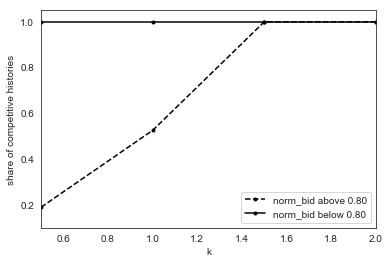

In [27]:
national_data = auction_data.AuctionData('../tests/reference_data/sample_with_firm_rank.csv')

filter_ties = auction_data.FilterTies(tolerance=.0001)
filtered_data = filter_ties(national_data)



filtered_data_above = auction_data.AuctionData.from_clean_bids(
    filtered_data.df_bids.loc[filtered_data.data.norm_bid>0.8])

filtered_data_below = auction_data.AuctionData.from_clean_bids(
    filtered_data.df_bids.loc[filtered_data.data.norm_bid<0.8])


k_array = [0.5, 1, 1.5, 2]
comp_histories_below = []
comp_histories_above = []


deviations = [-.025, .0, .001]
demands_below = [filtered_data_below.get_counterfactual_demand(rho) for rho in deviations]
demands_above = [filtered_data_above.get_counterfactual_demand(rho) for rho in deviations]


#share_ties_below = filter_ties.get_ties(national_data_below_80).mean()

#share_ties_above = filter_ties.get_ties(national_data_above_80).mean()

for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_above)]
    
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_above, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )

    share = min_collusion_solver.result.solution
    print(1 - share)            
    comp_histories_above.append(1 - share)
    

for k_0 in k_array:
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands_below)]
        
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_below, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=350,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )

    share = min_collusion_solver.result.solution
    print(1 - share)            
#    result = min_collusion_solver.result
#    result_up = min_collusion_solver_up.result
    comp_histories_below.append(1 - share)


plt.plot(k_array,comp_histories_above, 'k.--', label="norm_bid above 0.80")
plt.plot(k_array,comp_histories_below, 'k.-', label="norm_bid below 0.80")
plt.legend(loc='lower right')
plt.axis([0.5, 2, 0.1, 1.05])
plt.xlabel('k')
plt.ylabel('share of competitive histories')  
plt.savefig('above_below_80.pdf')


In [ ]:
national_data = auction_data.AuctionData('../tests/reference_data/sample_with_firm_rank.csv')
filter_ties = auction_data.FilterTies(tolerance=.0001)
filtered_data = filter_ties(national_data)

comp_histories_firms_2 = []

#firms = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
deviations = [-.025, .0, .001]
count = 1

while count < 11:
    filtered_data_firm = auction_data.AuctionData.from_clean_bids(
    filtered_data.df_bids.loc[filtered_data.data.rank2 == count])
    demand_firm = [filtered_data_firm.get_counterfactual_demand(rho) for rho in deviations]
    print(demand_firm)
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
    environments.InformationConstraint(k=1, sample_demands=demand_firm)]

    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data_firm, 
        deviations=deviations, 
        metric=analytics.IsNonCompetitive, 
        plausibility_constraints=constraints, 
        num_points=30000.0, 
        seed=0, 
        project=False, 
        filter_ties=None,
        number_iterations=500,
        confidence_level=.95,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )

    share = min_collusion_solver.result.solution
    print(1 - share) 
    comp_histories_firms_2.append(1 - share)
    count = count + 1
    
print(comp_histories_firms_2)

[0.2633498306850742, 0.17712946079708258, 0.17712946079708258]
0.5983225146928144
[0.15198956294846705, 0.1004566210045662, 0.1004566210045662]


In [31]:
print(comp_histories_firms_2)

[0.5983225785780911, 0.6802485938054595, 0.5983227188764317, 0.999999999996455, 0.6802486191487804, 0.12868268014296702, 0.1540303084010337, 0.1484759388140957, 0.6802488600281172, 0.15403031065044115, 0.5983224688964097, 0.6802491370470429, 0.14847594652930796, 0.1484759388998611, 0.9457864553052578, 0.1540303097504846, 0.6802487829774598, 0.14847594204754122, 0.1484759389661695, 1.0000000000062657, 0.16394525190076736, 1.000000000007576, 0.16394525271129934, 1.000000000000639, 0.1639452517060359, 0.9627616318719026, 0.16394526207861293, 0.5983224878333374, 0.16394525409827598, 0.598322458065558]


In [29]:
## Deviation temptation relative to profits -- Tsuchiura

[0.657617728531856, 0.21772853185595567, 0.21772853185595567]
0.024902024123935135
0.022800669295295613
0.0024582288933275498
0.0014624909312142519
[0.024902024123935135, 0.022800669295295613, 0.0024582288933275498, 0.0014624909312142519]


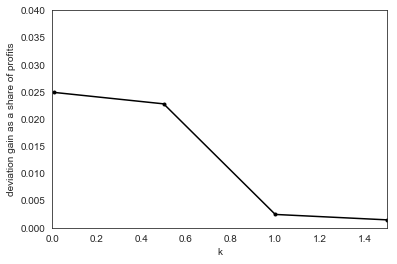

In [30]:
tsuchiura_data = auction_data.AuctionData('../tests/reference_data/tsuchiura_data.csv')
tsuchiura_before_min_price = auction_data.AuctionData(
    tsuchiura_data.df_bids.loc[tsuchiura_data.data.minprice.isnull()])


k_array = [0.01, 0.5, 1, 1.5]
dev_gain = []

deviations = [-.02, .0, .0008]

filter_ties = auction_data.FilterTies(tolerance=.0001)
filtered_data = filter_ties(tsuchiura_before_min_price)
demands = [filtered_data.get_counterfactual_demand(rho) for rho in deviations]
print(demands)
share_ties = filter_ties.get_ties(filtered_data).mean()


for k_0, p in zip(k_array, [True, False, False, False]):
    constraints = [environments.MarkupConstraint(max_markup=.5, min_markup=.02), 
               environments.InformationConstraint(k=k_0, sample_demands=demands)]
    
    min_collusion_solver = analytics.MinCollusionIterativeSolver(
        data=filtered_data, 
        deviations=deviations, 
        metric=analytics.DeviationTemptationOverProfits, 
        plausibility_constraints=constraints, 
        num_points=10000+(1 - p)*20000, 
        seed=0, 
        project=p, 
        number_iterations=350,
        confidence_level=.95,
        filter_ties=None,
        moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
        moment_weights=np.array([0, 0, 1])
    )

    gain = min_collusion_solver.result.solution
    print(gain)            
    dev_gain.append(gain)

print(dev_gain)


plt.plot(k_array,dev_gain, 'k.-')
plt.axis([0, 1.5, 0, 0.04])
plt.xlabel('k')
plt.ylabel('deviation gain as a share of profits')  
plt.savefig('tsuchiura_before_dev_gain.pdf')